**Estadística Aplicada**

**Primer Parcial**

*Nombre: Alexandra Guadalupe Valdez Mireles*

*Matrícula: 1910361*

In [2]:
## Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Librerías especializadas
import statsmodels.formula.api as smf

**PRIMER PROBLEMA**

In [5]:
#### carga la base de datos de películas
películas = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/peliculas.csv')

In [6]:
películas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1000 non-null   object 
 1   description       1000 non-null   object 
 2   release_year      1000 non-null   int64  
 3   rental_rate       1000 non-null   float64
 4   length            1000 non-null   int64  
 5   rating            1000 non-null   object 
 6   special_features  1000 non-null   object 
 7   category          997 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


a) ¿Cuántas películas hay, cuántos géneros y cuánto duran en promedio las películas?

In [7]:
películas.groupby('title').count()

,description,release_year,rental_rate,length,rating,special_features,category
title,,,,,,,
Academy Dinosaur,1,1,1,1,1,1,1
Ace Goldfinger,1,1,1,1,1,1,1
Adaptation Holes,1,1,1,1,1,1,1
Affair Prejudice,1,1,1,1,1,1,1
African Egg,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Young Language,1,1,1,1,1,1,1
Youth Kick,1,1,1,1,1,1,1
Zhivago Core,1,1,1,1,1,1,1


In [8]:
películas.groupby('category')['title'].count()

category
Action         64
Animation      66
Children       60
Classics       57
Comedy         58
Documentary    68
Drama          61
Family         69
Foreign        73
Games          61
Horror         56
Music          51
New            63
Sci-Fi         61
Sports         73
Travel         56
Name: title, dtype: int64

In [9]:
películas['length'].mean().round(1)

115.3

In [10]:
print('Cantidad de películas:',1000)
print('Cantidad de géneros:',16)
print('Duración promedio de películas:',películas['length'].mean().round(1))


Cantidad de películas: 1000
Cantidad de géneros: 16
Duración promedio de películas: 115.3


b) Crea  un  dataframe  llamado películas_dormir  con  las  películas  que  tienen  una duración superior a 2 horas y sean documentales

In [11]:
películas_dormir = pd.DataFrame(películas,columns=['title','length','category'])

In [12]:
películas_dormir

,title,length,category
0,Academy Dinosaur,86,Documentary
1,Ace Goldfinger,48,Horror
2,Adaptation Holes,50,Documentary
3,Affair Prejudice,117,Horror
4,African Egg,130,Family
...,...,...,...
995,Young Language,183,Documentary
996,Youth Kick,179,Music
997,Zhivago Core,105,Horror
998,Zoolander Fiction,101,Children


In [26]:
películas_dormir = películas_dormir[(películas_dormir['length']>=120) & (películas_dormir['category']=='Documentary')]

In [27]:
películas_dormir

,title,length,category
39,Army Flintstones,148,Documentary
57,Beach Heartbreakers,122,Documentary
128,Cause Date,179,Documentary
141,Chicken Hellfighters,122,Documentary
155,Clerks Angels,164,Documentary
205,Dancing Fever,144,Documentary
247,Dozen Lion,177,Documentary
260,Duffel Apocalypse,171,Documentary
440,Hunter Alter,125,Documentary
456,Independence Hotel,157,Documentary


c) Contar cuántas películas de cada género existen

In [32]:
películas.groupby('category')['category'].count()

category
Action         64
Animation      66
Children       60
Classics       57
Comedy         58
Documentary    68
Drama          61
Family         69
Foreign        73
Games          61
Horror         56
Music          51
New            63
Sci-Fi         61
Sports         73
Travel         56
Name: category, dtype: int64

d) Calcular la duración promedio de las películas de cada género.

In [33]:
películas.groupby('category')[['length']].mean()

,length
category,
Action,111.609375
Animation,111.015152
Children,109.800000
Classics,111.666667
Comedy,115.827586
Documentary,108.750000
Drama,119.885246
Family,114.782609
Foreign,121.698630


e) Crear una nueva columna que indique si una película es "Corta" (duración menor a 1.5 horas), "Normal" (entre 1.5 y 2.5 horas) o "Larga" (mayor a 2.5 horas).

In [34]:
películas_duración = pd.DataFrame(películas,columns=['title','length'])

In [36]:
películas_duración['length en horas'] = películas_duración['length'] / 60

In [37]:
películas_duración

,title,length,length en horas
0,Academy Dinosaur,86,1.433333
1,Ace Goldfinger,48,0.800000
2,Adaptation Holes,50,0.833333
3,Affair Prejudice,117,1.950000
4,African Egg,130,2.166667
...,...,...,...
995,Young Language,183,3.050000
996,Youth Kick,179,2.983333
997,Zhivago Core,105,1.750000
998,Zoolander Fiction,101,1.683333


In [39]:
# np.select (Si conjunto)
# Condiciones, valor de cada condición, valor si no se cumple ninguna condición
condiciones = [películas_duración['length en horas']<=1.5,
               películas_duración['length en horas']<2.5,
               películas_duración['length en horas']>=2.5]
valores = ['Corta','Normal','Larga']

películas_duración['Tipo de duración'] = np.select(condiciones,valores,default='Inválido')

In [40]:
películas_duración

,title,length,length en horas,Tipo de duración
0,Academy Dinosaur,86,1.433333,Corta
1,Ace Goldfinger,48,0.800000,Corta
2,Adaptation Holes,50,0.833333,Corta
3,Affair Prejudice,117,1.950000,Normal
4,African Egg,130,2.166667,Normal
...,...,...,...,...
995,Young Language,183,3.050000,Larga
996,Youth Kick,179,2.983333,Larga
997,Zhivago Core,105,1.750000,Normal
998,Zoolander Fiction,101,1.683333,Normal


**SEGUNDO PROBLEMA**

In [41]:
#### carga la base de datos de población Asgard
Asgard = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/poblacion_Asgard.csv')

In [42]:
Asgard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   País       90 non-null     object
 1   Estado     90 non-null     object
 2   Municipio  90 non-null     object
 3   Población  90 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.9+ KB


a) Ordena la base alfabéticamente por estado y por municipio

In [47]:
Asgard.sort_values(['Estado','Municipio'])

,País,Estado,Municipio,Población
16,Asgard,Alderaan,Ciudad Jedi,130312
1,Asgard,Alderaan,Fuente Dorada,49984
31,Asgard,Alderaan,Luz azul,914910
76,Asgard,Alderaan,Madero,774290
46,Asgard,Alderaan,San Isidro,159338
...,...,...,...,...
8,Asgard,Yaven,El Bosque,649663
83,Asgard,Yaven,Green Flag,380989
68,Asgard,Yaven,Santa María,111687
53,Asgard,Yaven,Villa Wendy,646914


b) Cuantos  estados  hay,  cuantos  municipios  hay  en  cada  estado  y  cuantos municipios hay en total.

In [48]:
Asgard['Estado'].count()

90

In [63]:
Asgard_Estados = Asgard.groupby('Estado').count()

In [65]:
Asgard_Estados

,País,Municipio,Población
Estado,,,
Alderaan,6,6,6
Atlantis,6,6,6
Endor,6,6,6
Genosha,6,6,6
Gotham,6,6,6
Mandalore,6,6,6
Mordor,6,6,6
Mustafar,6,6,6
Naboo,6,6,6


In [64]:
Asgard_Estados.count()

País         15
Municipio    15
Población    15
dtype: int64

In [66]:
print('Estados en total:',15)

Estados en total: 15


In [57]:
print('Total de municipios por estado:\n',Asgard.groupby('Estado').count()['Municipio'])

Total de municipios por estado:
 Estado
Alderaan     6
Atlantis     6
Endor        6
Genosha      6
Gotham       6
Mandalore    6
Mordor       6
Mustafar     6
Naboo        6
Narnia       6
Pandora      6
Sokovia      6
Tatooine     6
Wakanda      6
Yaven        6
Name: Municipio, dtype: int64


In [58]:
Asgard['Municipio'].count()

90

In [67]:
print('Municipios en total:',90)

Municipios en total: 90


c) Cuanta población tiene el país en total y cuanta población tiene cada estado

In [69]:
print('La población total de Asgard es de:',Asgard['Población'].sum())

La población total de Asgard es de: 43114719


In [70]:
Asgard.groupby('Estado')[['Población']].sum()

,Población
Estado,
Alderaan,2283452
Atlantis,3779656
Endor,2427956
Genosha,2871584
Gotham,3204304
Mandalore,2044164
Mordor,3627119
Mustafar,2183880
Naboo,1602111


d) Calcula la mediana de la población de los municipios, y clasifícalos, aquellos por arriba de la mediana deben llamarse “muy poblados” y aquellos debajo de la mediana “poco poblados”

In [91]:
print('La mediana de la población de los municipios es de:', Asgard['Población'].median())

La mediana de la población de los municipios es de: 450052.0


In [82]:
condiciones = [Asgard['Población']<=450052,
               Asgard['Población']>450052]
valores = ['Poco poblado','Muy poblado']

Asgard['Situación poblado'] = np.select(condiciones,valores,default='Inválido')

In [83]:
Asgard

,País,Estado,Municipio,Población,Poco poblado o Muy poblado,Situación poblado,Situación población
0,Asgard,Pandora,Reino Tierra,377896,Poco poblado,Poco poblado,Poco poblado
1,Asgard,Alderaan,Fuente Dorada,49984,Poco poblado,Poco poblado,Poco poblado
2,Asgard,Genosha,El Carmen,303918,Poco poblado,Poco poblado,Poco poblado
3,Asgard,Naboo,Omashu,265712,Poco poblado,Poco poblado,Poco poblado
4,Asgard,Mordor,Don Bosco,121151,Poco poblado,Poco poblado,Poco poblado
...,...,...,...,...,...,...,...
85,Asgard,Gotham,Mar violeta,44585,Poco poblado,Poco poblado,Poco poblado
86,Asgard,Mandalore,Mar amarillo,372369,Poco poblado,Poco poblado,Poco poblado
87,Asgard,Mustafar,Mar Azul,65044,Poco poblado,Poco poblado,Poco poblado
88,Asgard,Atlantis,Mar amarillo,961061,Muy poblado,Muy poblado,Muy poblado


##### No supe porqué en la tabla cuando intentaba cambiarle el nombre a la columna de poco o muy poblado se me iban agregando más columnas, por eso se ve así con la info repetida :( 

e) Encuentra  los  5  municipios  mas  poblados  y  los  cinco  municipios  menos poblados del país

In [95]:
### Ordenar de mayor a menor
Asgard_Población = Asgard.sort_values('Población', ascending=False)

In [96]:
Asgard_Población

,País,Estado,Municipio,Población,Poco poblado o Muy poblado,Situación poblado,Situación población
34,Asgard,Mordor,Madripur,998079,Muy poblado,Muy poblado,Muy población
27,Asgard,Mustafar,Villa Norte,997107,Muy poblado,Muy poblado,Muy población
6,Asgard,Sokovia,La Unión,986067,Muy poblado,Muy poblado,Muy población
74,Asgard,Narnia,Gral Escobedo,974548,Muy poblado,Muy poblado,Muy población
79,Asgard,Mordor,Yellow town,974324,Muy poblado,Muy poblado,Muy población
...,...,...,...,...,...,...,...
85,Asgard,Gotham,Mar violeta,44585,Poco poblado,Poco poblado,Poca población
26,Asgard,Mandalore,Shelbyville,31535,Poco poblado,Poco poblado,Poca población
39,Asgard,Endor,Villa rosa,25538,Poco poblado,Poco poblado,Poca población
14,Asgard,Narnia,Luz roja,14986,Poco poblado,Poco poblado,Poca población


In [97]:
# Los cinco municipios más poblados
Asgard_Población.head(5)

,País,Estado,Municipio,Población,Poco poblado o Muy poblado,Situación poblado,Situación población
34,Asgard,Mordor,Madripur,998079,Muy poblado,Muy poblado,Muy población
27,Asgard,Mustafar,Villa Norte,997107,Muy poblado,Muy poblado,Muy población
6,Asgard,Sokovia,La Unión,986067,Muy poblado,Muy poblado,Muy población
74,Asgard,Narnia,Gral Escobedo,974548,Muy poblado,Muy poblado,Muy población
79,Asgard,Mordor,Yellow town,974324,Muy poblado,Muy poblado,Muy población


In [98]:
# Los cinco municipios menos poblados
Asgard_Población.tail(5)

,País,Estado,Municipio,Población,Poco poblado o Muy poblado,Situación poblado,Situación población
85,Asgard,Gotham,Mar violeta,44585,Poco poblado,Poco poblado,Poca población
26,Asgard,Mandalore,Shelbyville,31535,Poco poblado,Poco poblado,Poca población
39,Asgard,Endor,Villa rosa,25538,Poco poblado,Poco poblado,Poca población
14,Asgard,Narnia,Luz roja,14986,Poco poblado,Poco poblado,Poca población
17,Asgard,Genosha,Ciudad Jedi,13666,Poco poblado,Poco poblado,Poca población


f) El municipio más poblado de cada estado

In [100]:
Asgard_Máspoblados = Asgard.groupby('Estado')[['Municipio','Población']].max()

In [101]:
Asgard_Máspoblados

,Municipio,Población
Estado,,
Alderaan,The Upside Down,914910
Atlantis,Villa Norte,961061
Endor,Villa western,875371
Genosha,Villa Lannister,822654
Gotham,Villa western,918710
Mandalore,Villa Roja,736716
Mordor,Yellow town,998079
Mustafar,Villa Norte,997107
Naboo,Villa Nikola,602661


**TERCER PROBLEMA**

a) Gráfico de barras de los 15 municipios más poblados de Asgard

In [108]:
Municipios = Asgard_Máspoblados['Municipio']
Habitantes = Asgard_Máspoblados['Población']

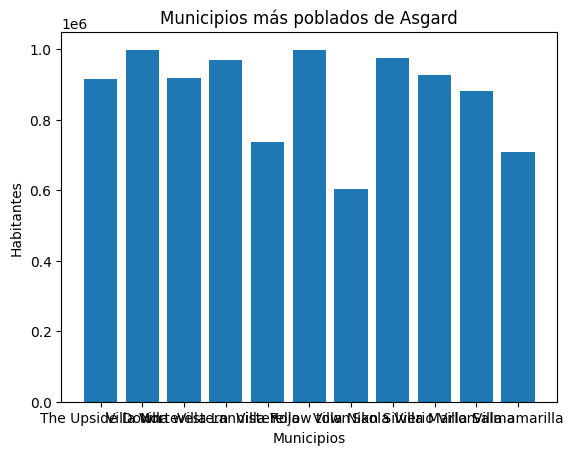

In [109]:
plt.bar(Municipios, Habitantes)
plt.xlabel('Municipios')
plt.ylabel('Habitantes')
plt.title('Municipios más poblados de Asgard')
plt.show()

b) Cuantas peliculas hay de cada género

In [118]:
películas_género = películas.groupby('category')['title'].count()

In [119]:
películas_género

category
Action         64
Animation      66
Children       60
Classics       57
Comedy         58
Documentary    68
Drama          61
Family         69
Foreign        73
Games          61
Horror         56
Music          51
New            63
Sci-Fi         61
Sports         73
Travel         56
Name: title, dtype: int64

In [124]:
Géneros = ['Action','Animation','Children','Classics','Comedy','Documentary','Drama','Family','Foreign','Games','Horror','Music','New','Sci-Fi','Sports','Travel']
Cantidad = [64,66,60,57,58,68,61,69,73,61,56,51,63,61,73,56]

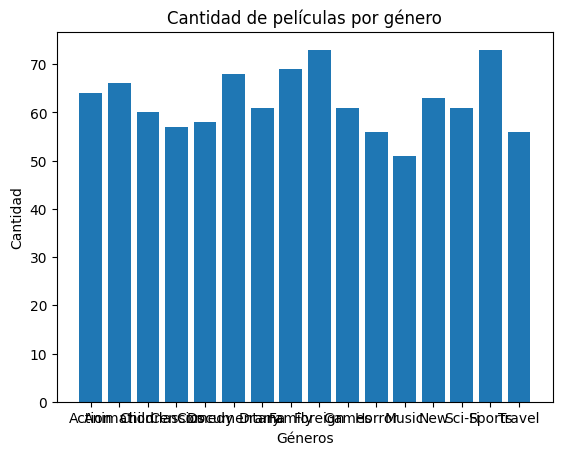

In [125]:
plt.bar(Géneros, Cantidad)
plt.xlabel('Géneros')
plt.ylabel('Cantidad')
plt.title('Cantidad de películas por género')
plt.show()